In [4]:
import sklearn; import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import mglearn

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'second feature')

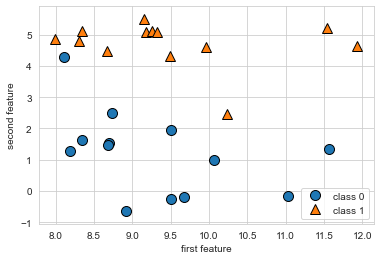

In [9]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0','class 1'])
plt.xlabel('first feature'); plt.ylabel('second feature')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


test_set predict: [1 0 1 0 1 0 0]
test_set accuracy: 0.86


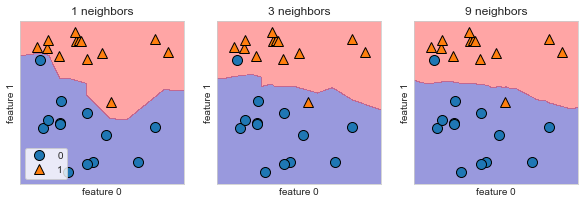

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('test_set predict:',clf.predict(X_test))
print('test_set accuracy: {:.2f}'.format(clf.score(X_test,y_test)))
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

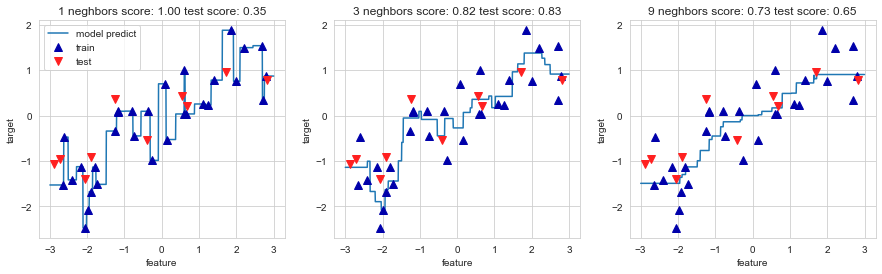

In [15]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neghbors score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predict", "train", "test"], loc="best")
plt.show()

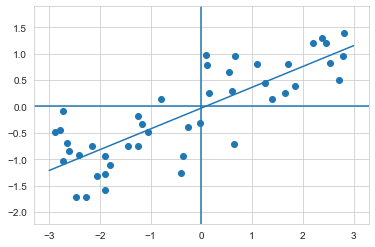

In [48]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(X_train,y_train); plt.axvline(); plt.axhline(); plt.ylim(min(y_train)-0.5,max(y_train)+0.5)
xt=np.linspace(-3,3,100); yt= lr.coef_*xt + lr.intercept_
plt.plot(xt,yt)


train_set score: 0.89
test_set score: 0.75
train_set score: 0.79
test_set score: 0.64
train_set score: 0.93
test_set score: 0.77


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

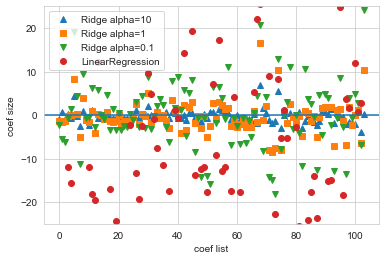

In [51]:
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

ridge = Ridge().fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef list"); plt.ylabel("coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-25, 25)
plt.legend(); plt.show()  # alpha가 클수록 규제 강화 l1 규제사용

train_set score: 0.29
test_set score: 0.21
using feature count: 4
train_set score: 0.90
test_set score: 0.77
using feature count: 33
train_set score: 0.95
test_set score: 0.64
using feature count: 96


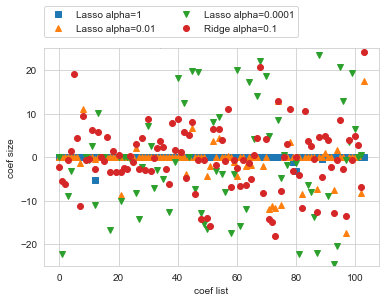

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("using feature count:", np.sum(lasso.coef_ != 0))

lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("using feature count:", np.sum(lasso001.coef_ != 0))

lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("using feature count:", np.sum(lasso00001.coef_ != 0))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list"); plt.ylabel("coef size")
plt.show()  # alpha가 클수록 규제 강화

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


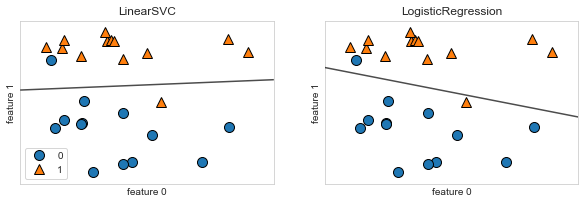

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

train_set score: 0.958
test_set score: 0.958
train_set score: 0.981
test_set score: 0.965
train_set score: 0.953
test_set score: 0.951


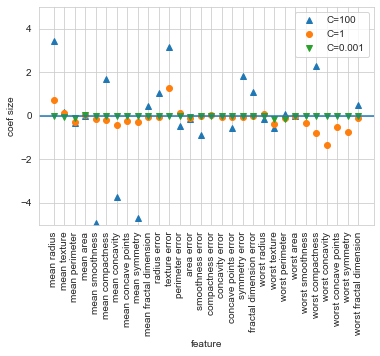

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg.score(X_test, y_test)))
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg001.score(X_test, y_test)))
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-5, 5)
plt.xlabel("feature"); plt.ylabel("coef size")
plt.legend(); plt.show()  #  C는 반대로 작을수록 규제 강화 l2규제 사용

coef list size:  (3, 2)
intercept list size:  (3,)


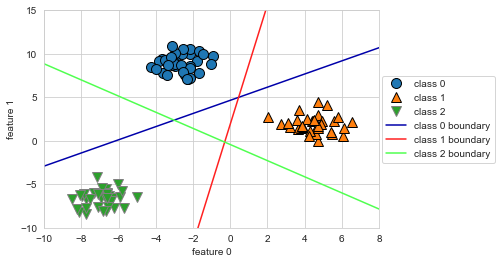

In [57]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
print("coef list size: ", linear_svm.coef_.shape)
print("intercept list size: ", linear_svm.intercept_.shape)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))
plt.show()

train_set score: 1.000
test_set socore: 0.937
train_set score: 0.988
test_set score: 0.951


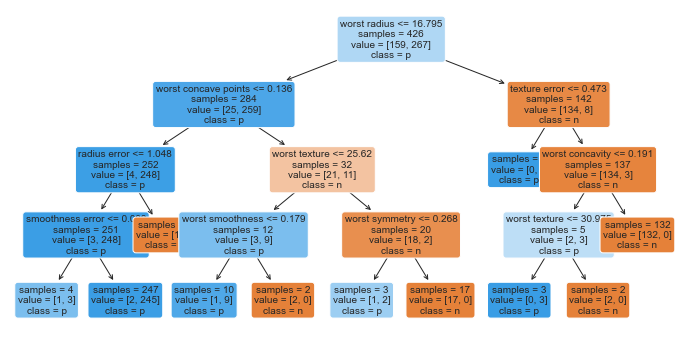

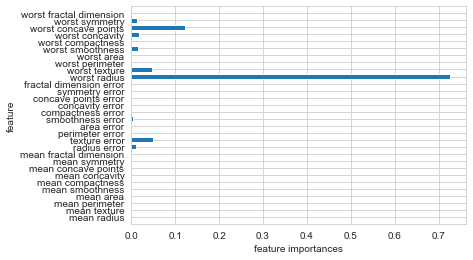

In [60]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train_set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test_set socore: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("train_set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test_set score: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["n", "p"], feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

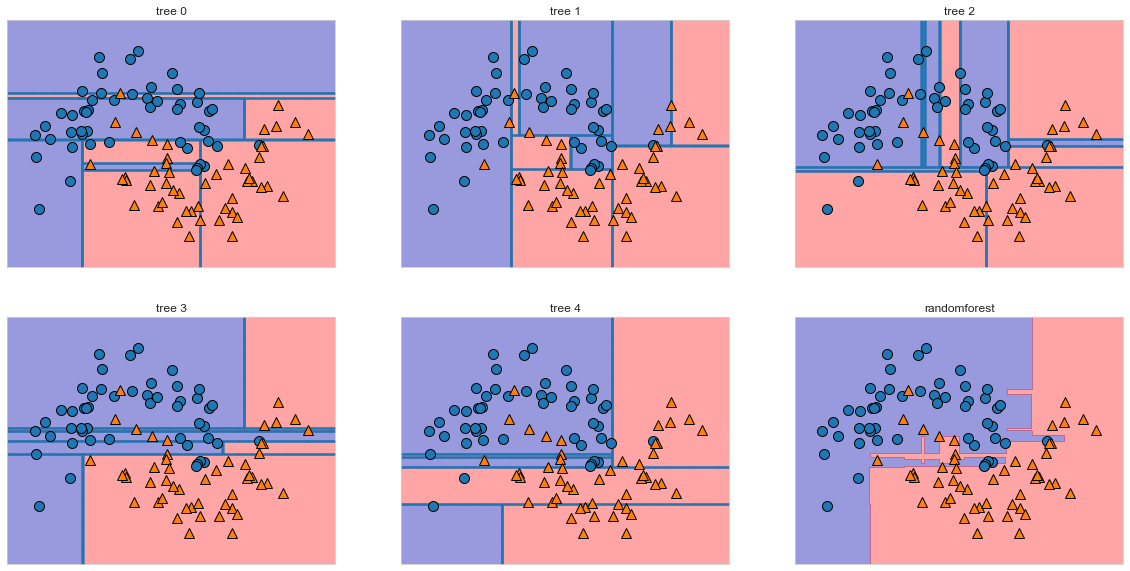

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("randomforest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

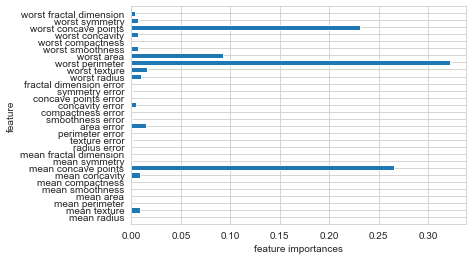

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

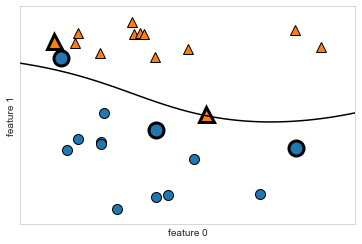

In [64]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0"); plt.ylabel("feature 1"); plt.show()

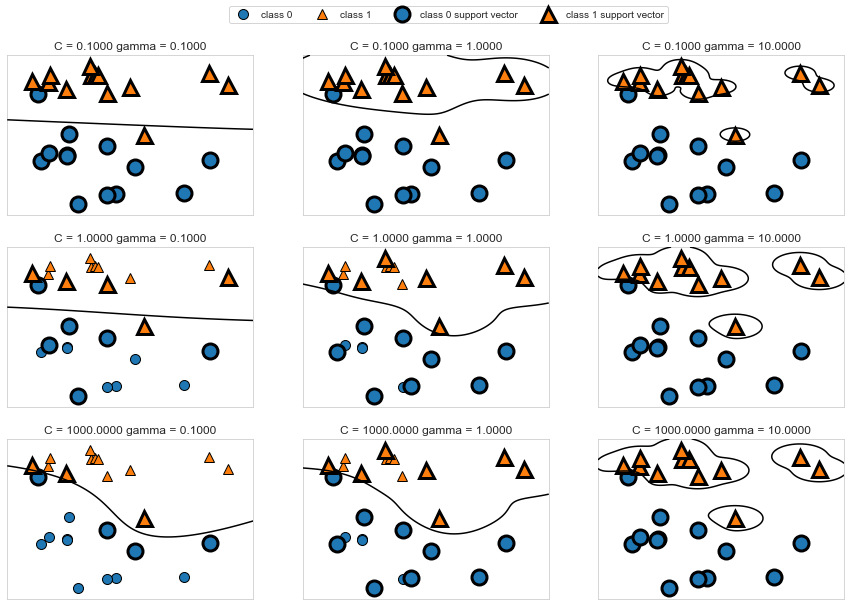

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()  # 이 정도만 해도 cpu 꽤 먹음

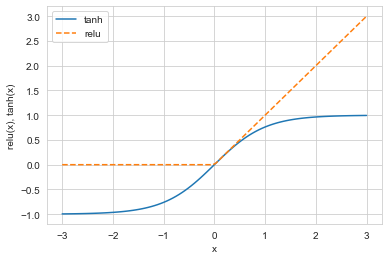

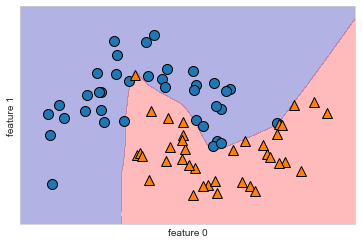

In [68]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x"); plt.ylabel("relu(x), tanh(x)"); plt.show()

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

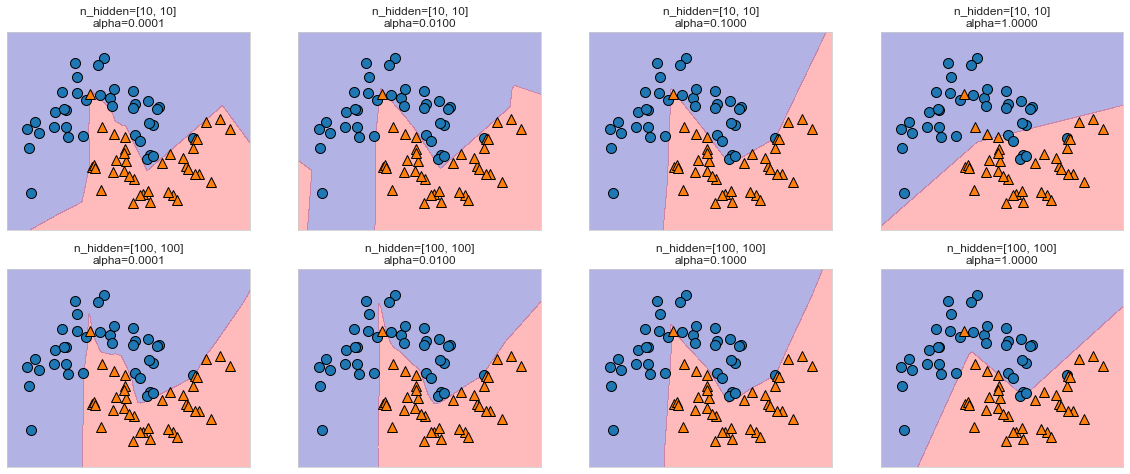

In [69]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

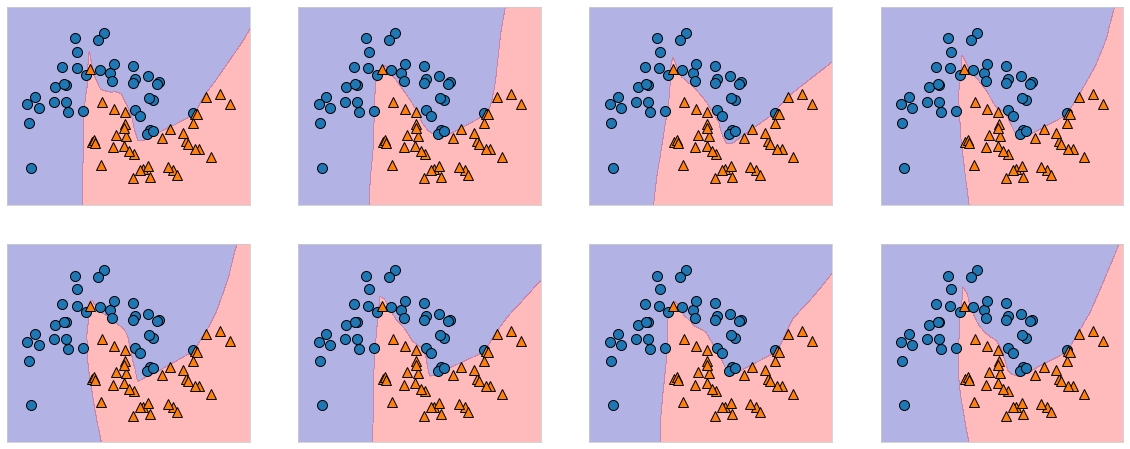

In [70]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

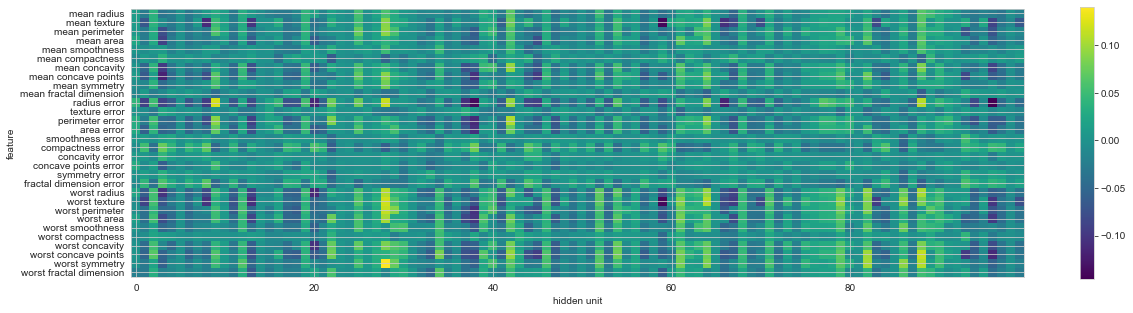

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp.fit(X_train_scaled, y_train)
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit"); plt.ylabel("feature")
plt.colorbar(); plt.show()